In [1]:
import solafune_tools
import rasterio
import glob
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box
from solafune_tools import settings
from solafune_tools import create_local_catalog_from_scratch
from solafune_tools import get_catalog_items_as_gdf
import geopandas as gpd
import json
from matplotlib.patches import Polygon


In [2]:
src = rasterio.open('./data/train_images/train_0.tif')
profile = src.profile  # Get the metadata of the original file
crs = profile['crs']  # Get the coordinate reference system of the original file
crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [3]:
with open("./data/train_annotations.json", "r") as f:
    labels = json.load(f)

In [4]:
#  Find first image in the JSON
target_filename = "train_0.tif"
train_0_data = None

for image_info in labels["images"]:
    if image_info["file_name"] == target_filename:
        train_0_data = image_info
        break

annotations = train_0_data["annotations"]

In [5]:
all_classes = []
for image_info in labels["images"]:
    for annotation in image_info["annotations"]:
        all_classes.append(annotation["class"])

# 3. Optionally turn the list into a set to get unique labels only
unique_classes = set(all_classes)

print("Unique classes:", unique_classes)


Unique classes: {'plantation', 'mining', 'grassland_shrubland', 'logging'}


In [6]:
train_0_label = annotations[0]['class']

In [7]:
train_0_segmentation = annotations[0]["segmentation"]

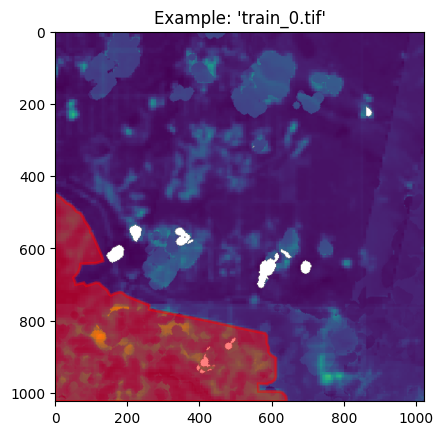

In [13]:
polygon_coords = [(train_0_segmentation[i], train_0_segmentation[i+1]) for i in range(0, len(train_0_segmentation), 2)]

# 3. Plot the image and the polygon
fig, ax = plt.subplots()

# Show the raster band
ax.imshow(src.read(1))

# Create a Polygon patch; fill=False draws only the outline
poly_patch = Polygon(
    polygon_coords,
    edgecolor="red",
    linewidth=2,
    facecolor="red",
    alpha=0.5,
)
ax.add_patch(poly_patch)

plt.title("Example: 'train_0.tif'")
plt.show()
